In [1]:
from wearsed.training.metric import get_precision_recall, calc_f1_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Preprocessing

In [10]:
runs = [
    ('new_baseline_BN', 31),
    ('pleth_pre_stat', 49),
    ('pleth_pre_vae', 49),
    ('pleth_pre_stat_vae', 49)
]

In [25]:
run_names = ['In-model', 'Statistical', 'VAE', 'Statistical + VAE']
metrics = {
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
for run, epoch in runs:
    print(f'### {run}')
    output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{epoch}.csv')
    y_pred, y_true = output['predictions'], output['targets']
    precision, recall = get_precision_recall(y_pred, y_true, 0.4, True, correctify_size=3)
    f1 = calc_f1_score(precision, recall)
    print(f'Precision: {precision*100:.1f}%, Recall: {recall*100:.1f}%, F1: {f1*100:.1f}%')
    metrics['Precision'].append(round(precision, 3))
    metrics['Recall'].append(round(recall, 3))
    metrics['F1-Score'].append(round(f1, 3))

### new_baseline_BN
Precision: 86.0%, Recall: 65.0%, F1: 74.1%
### pleth_pre_stat
Precision: 88.6%, Recall: 55.9%, F1: 68.6%
### pleth_pre_vae
Precision: 87.3%, Recall: 59.5%, F1: 70.8%
### pleth_pre_stat_vae
Precision: 86.5%, Recall: 64.8%, F1: 74.1%


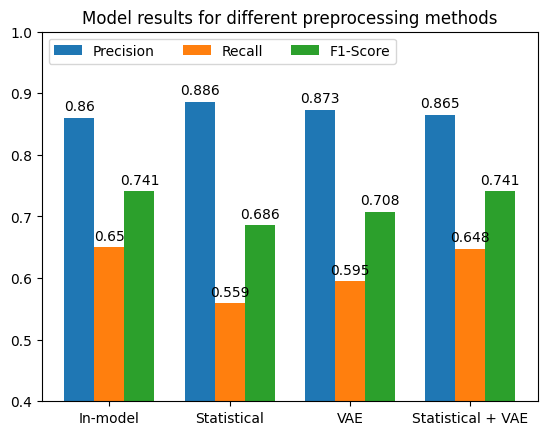

In [27]:
x = np.arange(len(run_names))
width = 0.25
multiplier = 0
fig, ax = plt.subplots()

for metric, value in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=metric)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Model results for different preprocessing methods')
ax.set_xticks(x + width, run_names)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.4, 1.0)

plt.show()

### SDB Detection Model

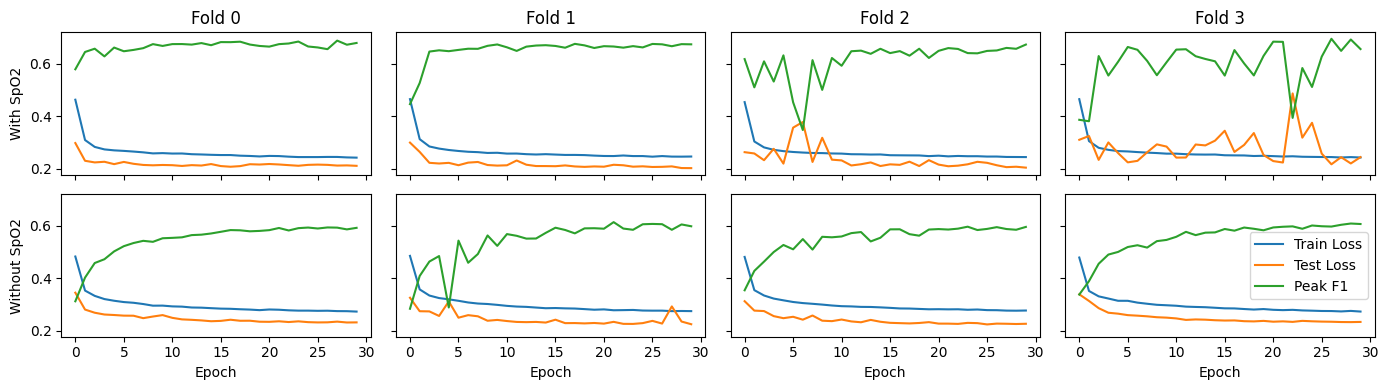

In [57]:
runs = ['final_default', 'final_no_spo2']

_, axs = plt.subplots(len(runs), 4, figsize=(14, len(runs)*2), sharex=True, sharey=True)
for row, run in enumerate(runs):
    for col, fold in enumerate(range(4)):
        if row == 0:
            axs[row, col].set_title(f'Fold {fold}')
        if row == 1:
            axs[row, col].set_xlabel('Epoch')
        if col == 0:
            axs[row, col].set_ylabel(['With SpO2', 'Without SpO2'][row])
        results = pd.read_csv(f'../wearsed/training/attention_unet/output/{run}/f-{fold}/losses.csv')
        results.columns = ['Train Loss', 'Test Loss', 'Peak F1']
        results.plot(ax=axs[row, col], legend=row+col==len(runs)+2)
        #axs[row, col].grid()
plt.tight_layout()

In [2]:
data = pd.read_csv('62_plot_generation.csv')

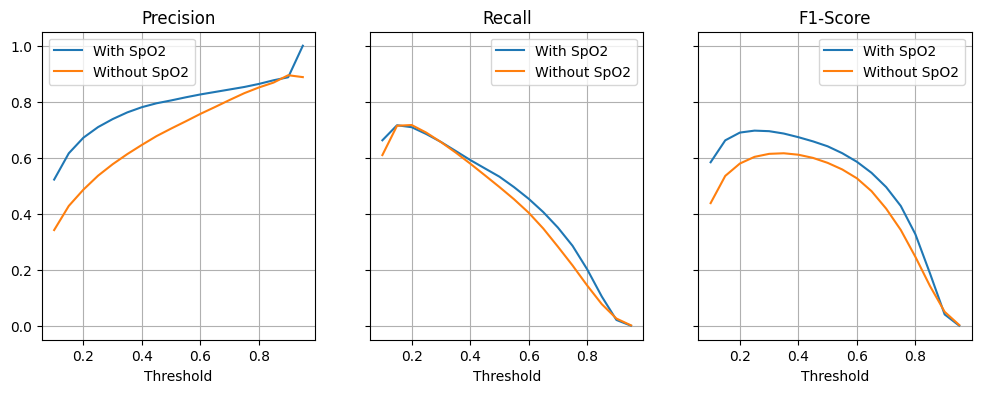

In [55]:
_, axs = plt.subplots(1, 3, figsize=(4*3, 4), sharex=True, sharey=True)
for col, (metric, metric_name) in enumerate([('precision', 'Precision'), ('recall', 'Recall'), ('f1', 'F1-Score')]):
    metric_values = {}
    for run, run_name in zip(runs, ['With SpO2', 'Without SpO2']):
        metric_values[run_name] = data[(data['run'] == run) & (data['correctify'] == True)][['thr', metric]].set_index('thr').iloc[1:20][metric]
    pd.DataFrame(metric_values).plot(ax=axs[col])
    axs[col].set_title(metric_name)
    axs[col].set_xlabel('Threshold')
    axs[col].grid()

### Sleep Stages

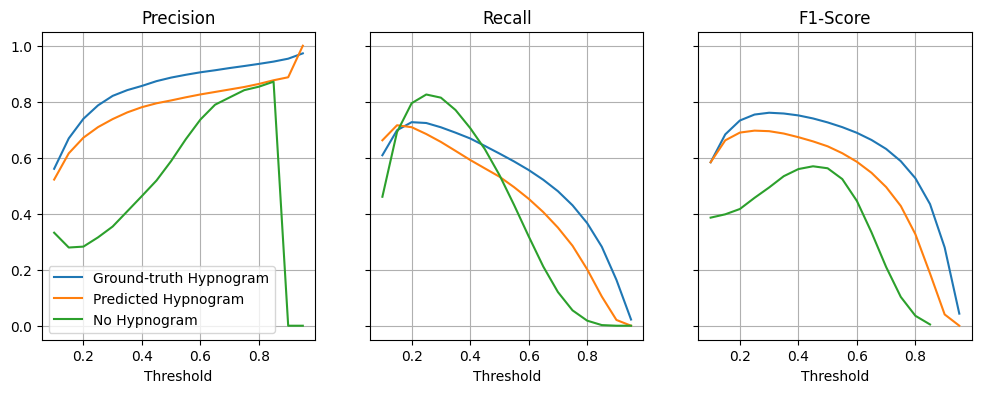

In [7]:
runs = ['attention_none', 'final_default', 'no_hypnogram']
_, axs = plt.subplots(1, 3, figsize=(4*3, 4), sharex=True, sharey=True)
for col, (metric, metric_name) in enumerate([('precision', 'Precision'), ('recall', 'Recall'), ('f1', 'F1-Score')]):
    metric_values = {}
    for run, run_name in zip(runs, ['Ground-truth Hypnogram', 'Predicted Hypnogram', 'No Hypnogram']):
        metric_values[run_name] = data[(data['run'] == run) & (data['correctify'] == True)][['thr', metric]].set_index('thr').iloc[1:20][metric]
    pd.DataFrame(metric_values).plot(ax=axs[col], legend=col==0)
    axs[col].set_title(metric_name)
    axs[col].set_xlabel('Threshold')
    axs[col].grid()

In [14]:
data[(data['run'] == 'attention_none') & (data['correctify'] == True)][['thr', metric]].set_index('thr').iloc[1:20][metric]

thr
0.10    0.583650
0.15    0.683332
0.20    0.732960
0.25    0.754189
0.30    0.760674
0.35    0.757928
0.40    0.751124
0.45    0.740269
0.50    0.726118
0.55    0.709207
0.60    0.688934
0.65    0.663378
0.70    0.631340
0.75    0.587633
0.80    0.526593
0.85    0.434297
0.90    0.279662
0.95    0.043187
Name: f1, dtype: float64

In [13]:
data[(data['run'] == 'final_default') & (data['correctify'] == True)][['thr', metric]].set_index('thr').iloc[1:20][metric]

thr
0.10    0.583812
0.15    0.662113
0.20    0.689792
0.25    0.696771
0.30    0.694811
0.35    0.686360
0.40    0.673347
0.45    0.658354
0.50    0.640773
0.55    0.616110
0.60    0.585481
0.65    0.546087
0.70    0.495197
0.75    0.427716
0.80    0.326692
0.85    0.186424
0.90    0.040239
0.95    0.000033
Name: f1, dtype: float64

In [10]:
data[(data['run'] == 'no_hypnogram') & (data['correctify'] == True)][['thr', metric]].set_index('thr').iloc[1:20][metric]

thr
0.10    0.385994
0.15    0.397867
0.20    0.416871
0.25    0.456669
0.30    0.493780
0.35    0.534055
0.40    0.559458
0.45    0.569426
0.50    0.562328
0.55    0.523789
0.60    0.445536
0.65    0.333277
0.70    0.209584
0.75    0.102922
0.80    0.035387
0.85    0.004536
0.90         NaN
0.95         NaN
Name: f1, dtype: float64

### AHI Results

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import cohen_kappa_score
from wearsed.training.metric_info import get_ahis, combine_fold_results

def get_ahi_severity_class(ahi):
    if ahi < 5:   # Normal
        return 0
    if ahi < 15:  # Mild
        return 1
    if ahi < 30:  # Moderate
        return 2
    return 3      # Severe

def get_ahi_severity_class_NBL(ahi):
    if ahi < 5 and ahi >= 2.4:
        return 1  # Mild
    if ahi > 5 and ahi < 7:
        return 0  # Normal
    if ahi < 15 and ahi >= 12.4:
        return 2  # Moderate
    if ahi > 15 and ahi < 17.4:
        return 1  # Mild
    if ahi < 30 and ahi >= 26.6:
        return 3  # Severe
    if ahi > 30 and ahi < 35.2:
        return 2  # Moderate
    return -1     # No NBL

In [2]:
runs, folds, epoch = ['final_info', 'final_no_spo2_info'], [0, 1, 2, 3], 28
thr = 0.25

tst_df = pd.read_csv('59_tsts.csv')

print('### Loading Results...')
y_pred_spo2, y_true_spo2, hypnogram_data_spo2, class_data_spo2 = combine_fold_results(runs[0], folds, epoch, drop_sep=False)

print('### Calculating AHIs')
ahis_pred_spo2, ahis_true_spo2 = get_ahis(y_pred_spo2, y_true_spo2, hypnogram_data_spo2, class_data_spo2, thr, correctify=True, correctify_size=3, tsts=tst_df['tst_true'].values)

print('### Calculating Severity classes with and without NBL')
ahi_severitys_pred_spo2 = [get_ahi_severity_class(ahi) for ahi in ahis_pred_spo2]
ahi_severitys_true_spo2 = [get_ahi_severity_class(ahi) for ahi in ahis_true_spo2]
ahi_severitys_pred_NBL_spo2 = []
for ahi, ahi_severity_true in zip(ahis_pred_spo2, ahi_severitys_true_spo2):
    hard_severity = get_ahi_severity_class(ahi)
    soft_severity = get_ahi_severity_class_NBL(ahi)
    if soft_severity == ahi_severity_true:
        ahi_severitys_pred_NBL_spo2.append(soft_severity)
    else:
        ahi_severitys_pred_NBL_spo2.append(hard_severity)

print('### Generate the confusion matrix')
confusion_matrix_spo2 = [[0]*4 for _ in range(4)]
for ahi_severity_pred, ahi_severity_true in zip(ahi_severitys_pred_spo2, ahi_severitys_true_spo2):
    confusion_matrix_spo2[ahi_severity_true][ahi_severity_pred] += 1
confusion_matrix_NBL_spo2 = [[0]*4 for _ in range(4)]
for ahi_severity_pred, ahi_severity_true in zip(ahi_severitys_pred_NBL_spo2, ahi_severitys_true_spo2):
    confusion_matrix_NBL_spo2[ahi_severity_true][ahi_severity_pred] += 1

### Loading Results...
### Calculating AHIs
### Calculating Severity classes with and without NBL
### Generate the confusion matrix


In [4]:
print('### Loading Results...')
y_pred_no_spo2, y_true_no_spo2, hypnogram_data_no_spo2, class_data_no_spo2 = combine_fold_results(runs[1], folds, epoch, drop_sep=False)

print('### Calculating AHIs')
ahis_pred_no_spo2, ahis_true_no_spo2 = get_ahis(y_pred_no_spo2, y_true_no_spo2, hypnogram_data_no_spo2, class_data_no_spo2, thr, correctify=True, correctify_size=3, tsts=tst_df['tst_true'].values)

print('### Calculating Severity classes with and without NBL')
ahi_severitys_pred_no_spo2 = [get_ahi_severity_class(ahi) for ahi in ahis_pred_no_spo2]
ahi_severitys_true_no_spo2 = [get_ahi_severity_class(ahi) for ahi in ahis_true_no_spo2]
ahi_severitys_pred_NBL_no_spo2 = []
for ahi, ahi_severity_true in zip(ahis_pred_no_spo2, ahi_severitys_true_no_spo2):
    hard_severity = get_ahi_severity_class(ahi)
    soft_severity = get_ahi_severity_class_NBL(ahi)
    if soft_severity == ahi_severity_true:
        ahi_severitys_pred_NBL_no_spo2.append(soft_severity)
    else:
        ahi_severitys_pred_NBL_no_spo2.append(hard_severity)

print('### Generate the confusion matrix')
confusion_matrix_no_spo2 = [[0]*4 for _ in range(4)]
for ahi_severity_pred, ahi_severity_true in zip(ahi_severitys_pred_no_spo2, ahi_severitys_true_no_spo2):
    confusion_matrix_no_spo2[ahi_severity_true][ahi_severity_pred] += 1
confusion_matrix_NBL_no_spo2 = [[0]*4 for _ in range(4)]
for ahi_severity_pred, ahi_severity_true in zip(ahi_severitys_pred_NBL_no_spo2, ahi_severitys_true_no_spo2):
    confusion_matrix_NBL_no_spo2[ahi_severity_true][ahi_severity_pred] += 1

### Loading Results...
### Calculating AHIs
### Calculating Severity classes with and without NBL
### Generate the confusion matrix


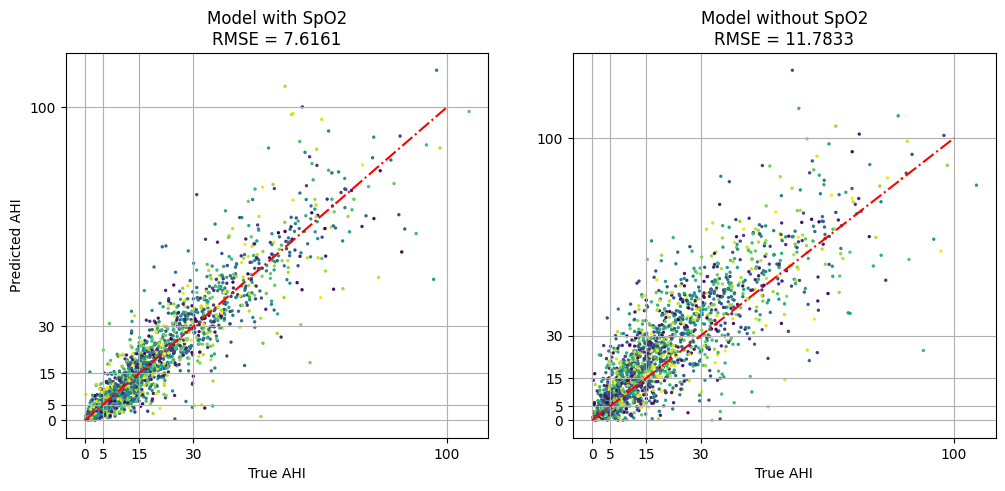

In [8]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(ahis_true_spo2, ahis_pred_spo2, s=2, c=np.random.rand(len(ahis_true_spo2), 1))
ax1.plot([0, 100], [0, 100], 'r-.')
ax1.set_title(f'Model with SpO2\nRMSE = {np.sqrt(((np.array(ahis_pred_spo2) - np.array(ahis_true_spo2)) ** 2).mean()):.4f}')
ax1.set_xlabel('True AHI')
ax1.set_ylabel('Predicted AHI')
ax1.set_xticks([0, 5, 15, 30, 100])
ax1.set_yticks([0, 5, 15, 30, 100])
ax1.grid()

ax2.scatter(ahis_true_no_spo2, ahis_pred_no_spo2, s=2, c=np.random.rand(len(ahis_true_no_spo2), 1))
ax2.plot([0, 100], [0, 100], 'r-.')
ax2.set_title(f'Model without SpO2\nRMSE = {np.sqrt(((np.array(ahis_pred_no_spo2) - np.array(ahis_true_no_spo2)) ** 2).mean()):.4f}')
ax2.set_xlabel('True AHI')
ax2.set_xticks([0, 5, 15, 30, 100])
ax2.set_yticks([0, 5, 15, 30, 100])
ax2.grid()

plt.show()

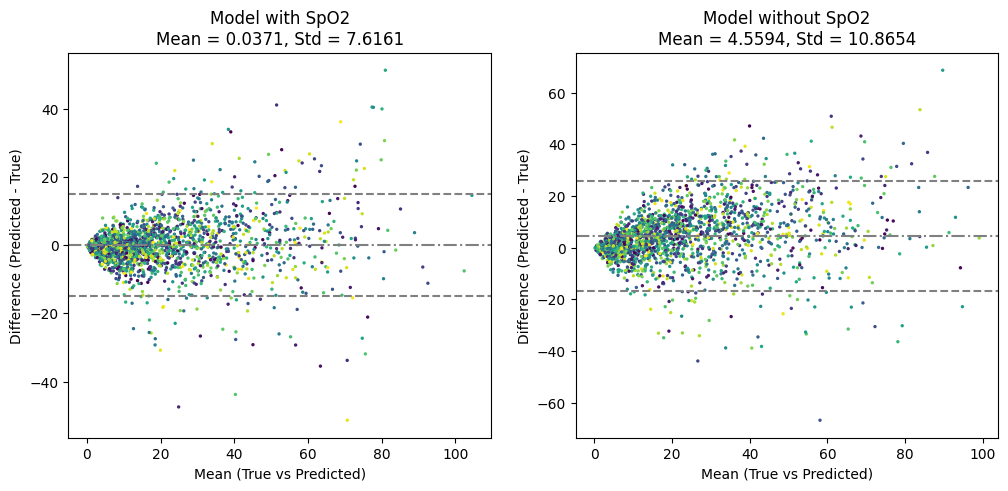

In [10]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

mean = np.mean([ahis_pred_spo2, ahis_true_spo2], axis=0)
diff = np.array(ahis_pred_spo2) - np.array(ahis_true_spo2)
diff_mean, diff_std = np.mean(diff), np.std(diff, axis=0)
ax1.scatter(mean, diff, s=2, c=np.random.rand(len(ahis_true_spo2), 1))
ax1.axhline(diff_mean,                 color='gray', linestyle='-.')
ax1.axhline(diff_mean + 1.96*diff_std, color='gray', linestyle='--')
ax1.axhline(diff_mean - 1.96*diff_std, color='gray', linestyle='--')
ax1.set_title(f'Model with SpO2\nMean = {diff_mean:.4f}, Std = {diff_std:.4f}')
ax1.set_xlabel('Mean (True vs Predicted)')
ax1.set_ylabel('Difference (Predicted - True)')

mean = np.mean([ahis_pred_no_spo2, ahis_true_no_spo2], axis=0)
diff = np.array(ahis_pred_no_spo2) - np.array(ahis_true_no_spo2)
diff_mean, diff_std = np.mean(diff), np.std(diff, axis=0)
ax2.scatter(mean, diff, s=2, c=np.random.rand(len(ahis_true_no_spo2), 1))
ax2.axhline(diff_mean,                 color='gray', linestyle='-.')
ax2.axhline(diff_mean + 1.96*diff_std, color='gray', linestyle='--')
ax2.axhline(diff_mean - 1.96*diff_std, color='gray', linestyle='--')
ax2.set_title(f'Model without SpO2\nMean = {diff_mean:.4f}, Std = {diff_std:.4f}')
ax2.set_xlabel('Mean (True vs Predicted)')
ax2.set_ylabel('Difference (Predicted - True)')

plt.show()